In [12]:
def rotate(arr):
    if len(arr) < 3:
        raise ValueError("Array must have at least 3 elements.")
    
    first_three = arr[:3]
    remaining = arr[3:]
    
    return np.concatenate((remaining, first_three))

def rotate_back(arr):
    if len(arr) < 3:
        raise ValueError("Array must have at least 3 elements.")
    
    last_three = arr[-3:]
    remaining = arr[:-3]
    
    return np.concatenate((last_three, remaining))

True peak orientations: 123.71 degrees, 316.78 degrees
True peak amplitudes: 8.12 degrees, 3.96 degrees


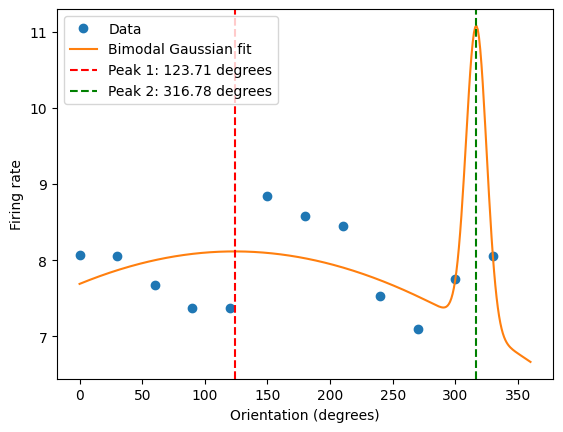

In [20]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the bimodal Gaussian function
def bimodal_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * np.exp(-(x - mu1) ** 2 / (2 * sigma1 ** 2)) +
            A2 * np.exp(-(x - mu2) ** 2 / (2 * sigma2 ** 2)))

# Data: firing rates at 12 orientations
orientations = np.arange(0, 360, 30)  # [0, 30, 60, ..., 330]
firing_rates = np.array([8.075, 8.050, 7.675, 7.375, 7.375, 8.850, 8.575, 8.450, 7.525, 7.100, 7.750, 8.050])  # example data

# Initial guesses for the parameters
A1_guess = np.max(firing_rates)
mu1_guess = orientations[np.argmax(firing_rates)]
sigma1_guess = 30  # an initial guess for the spread
A2_guess = A1_guess
mu2_guess = (mu1_guess + 180) % 360  # 180 degrees apart from mu1
sigma2_guess = sigma1_guess

try:
    initial_guesses = [A1_guess, mu1_guess, sigma1_guess, A2_guess, mu2_guess, sigma2_guess]
    # Fit the bimodal Gaussian to the data
    popt, _ = curve_fit(bimodal_gaussian, orientations, firing_rates, p0=initial_guesses)
    A1, mu1, sigma1, A2, mu2, sigma2 = popt
    if mu1 <= 30 or mu1 >= 330 or mu2 <= 30 or mu2 >= 330:
        raise RuntimeError
except RuntimeError:
    initial_guesses = [A1_guess, mu1_guess + 90, sigma1_guess, A2_guess, mu2_guess + 90, sigma2_guess]
    # Fit the bimodal Gaussian to the data
    popt, _ = curve_fit(bimodal_gaussian, orientations, rotate(firing_rates), p0=initial_guesses)
    popt[1] += 90
    popt[4] += 90
    A1, mu1, sigma1, A2, mu2, sigma2 = popt
# Extract the fitted parameters


# Print the true peak orientations
print(f'True peak orientations: {mu1:.2f} degrees, {mu2:.2f} degrees')
print(f'True peak amplitudes: {A1:.2f}, {A2:.2f}s')

# Plot the data and the fit
x_fit = np.linspace(0, 360, 360)
y_fit = bimodal_gaussian(x_fit, *popt)

plt.plot(orientations, firing_rates, 'o', label='Data')
plt.plot(x_fit, y_fit, '-', label='Bimodal Gaussian fit')
plt.axvline(mu1, color='r', linestyle='--', label=f'Peak 1: {mu1:.2f} degrees')
plt.axvline(mu2, color='g', linestyle='--', label=f'Peak 2: {mu2:.2f} degrees')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Firing rate')
plt.legend()
plt.show()

In [ ]:
2.625
0.850
0.650
0.525
0.725
2.775
3.925
1.875
1.000
0.850
0.775
1.700
